In [1]:
import numpy as np

from clustcausal.algs.clust_pc import ClustPC
from clustcausal.clusterdag.cluster_dag import CDAG

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Showcase of C-PC algorithm

In [2]:
# Get Data
import numpy as np

# Define the correlation matrix
correlation_matrix = np.array([[1.0, 0.8, 0.5, 0.3, -0.2],
                              [0.8, 1.0, 0.7, 0.2, -0.4],
                              [0.5, 0.7, 1.0, 0.4, -0.1],
                              [0.3, 0.2, 0.4, 1.0, -0.3],
                              [-0.2, -0.4, -0.1, -0.3, 1.0]])

# Generate the correlated random variables
data = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0], cov=correlation_matrix, size=1000)

In [3]:
def generate_gaussian_variables(num_samples = 10000):
    
    # Define influence relationships
    influences = {
        1: [],
        2: [1],
        3: [2],
        4: [3],
        5: [4],
        6: [1, 4, 5],
        7: [1, 2, 6]
    }
    n = len(influences)
    # Initialize variables
    variables = np.zeros((num_samples, n))

    # Generate variables
    for i in range(1, n+1):
        influence_weight = 0
        for j in influences[i]:
            influence_weight += variables[:,j-1]
        variables[:,i-1] = np.random.normal(size = num_samples) + influence_weight
    return variables

# Test the program
data = generate_gaussian_variables()
print("Generated variables:", data)
print(data.shape)

Generated variables: [[ 0.0208013  -0.13711939 -1.28066006 ... -1.57900916 -2.67414563
  -4.61640776]
 [ 1.11313555  1.40128053  3.03905774 ...  1.54776725  5.09078462
   7.21324452]
 [-0.09944893  0.07872894 -0.09997167 ...  2.25003179  4.47923657
   3.77657334]
 ...
 [ 0.21001694 -0.09753797  0.62592807 ...  0.65422415  0.3065749
  -0.04235901]
 [ 1.97242566  2.86276524  3.31817948 ...  4.28551628  8.28828923
  13.62878048]
 [ 0.35449464 -0.12086894  0.95469381 ...  0.21955195 -0.1018157
   0.63544068]]
(10000, 7)


2023-06-24 21:01:58,685 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:73] - INFO: oriented edge: (C1,C2)
2023-06-24 21:01:58,686 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:73] - INFO: oriented edge: (C1,C3)
2023-06-24 21:01:58,686 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:73] - INFO: oriented edge: (C2,C3)


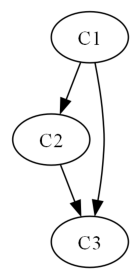

In [4]:
# Build a CDAG
# A perfect C-DAG
# cluster_mapping = {'C1': ['X1'], 'C2': ['X2'], 'C3': ['X3'], \
#                    'C4': ['X4'], 'C5': ['X5'], 'C6': ['X6'], 'C7': ['X7']}
# cluster_edges = [('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C4', 'C5'), \
#                  ('C1', 'C6'), ('C4', 'C6'), ('C5', 'C6'), ('C1', 'C7'), \
#                     ('C2', 'C7'), ('C6', 'C7')]
# Or, an actual C-DAG
cluster_mapping = {'C1': ['X1', 'X2', 'X3'], 'C2': ['X4', 'X5'], 'C3': ['X6', 'X7']}
cluster_edges = [('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3')]
cdag = CDAG(cluster_mapping, cluster_edges)
cdag.draw_cluster_graph()

2023-06-24 21:01:58,903 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X4)
2023-06-24 21:01:58,904 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X5)
2023-06-24 21:01:58,904 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X6)
2023-06-24 21:01:58,905 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X7)
2023-06-24 21:01:58,905 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X2,X4)
2023-06-24 21:01:58,906 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X2,X5)
2023-06-24 21:01:58,907 - c:\Users\JanMarco\ML

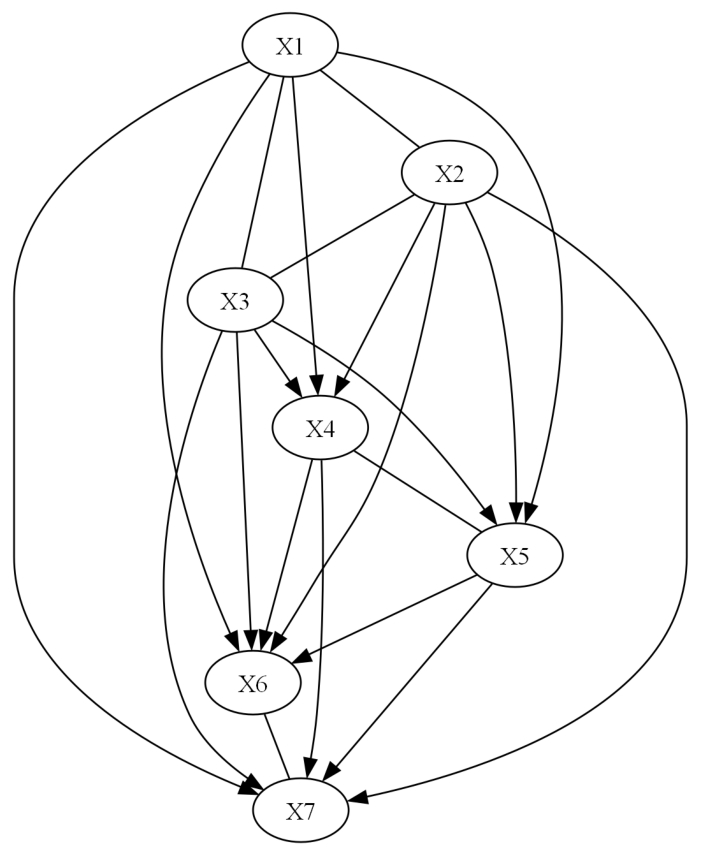

In [5]:
# For illustrative purposes, get mpdag and draw it manually (usually ClustPC handles this)
mpdag = cdag.cdag_to_mpdag()
cdag.draw_mpdag()

In [6]:
cdag.node_names

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

In [7]:
clustpc = ClustPC(cdag = cdag, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)

2023-06-24 21:01:59,503 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X4)
2023-06-24 21:01:59,504 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X5)
2023-06-24 21:01:59,505 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X6)
2023-06-24 21:01:59,505 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X1,X7)
2023-06-24 21:01:59,506 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X2,X4)
2023-06-24 21:01:59,506 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:99] - INFO: oriented edge: (X2,X5)
2023-06-24 21:01:59,507 - c:\Users\JanMarco\ML

indep_test:  fisherz


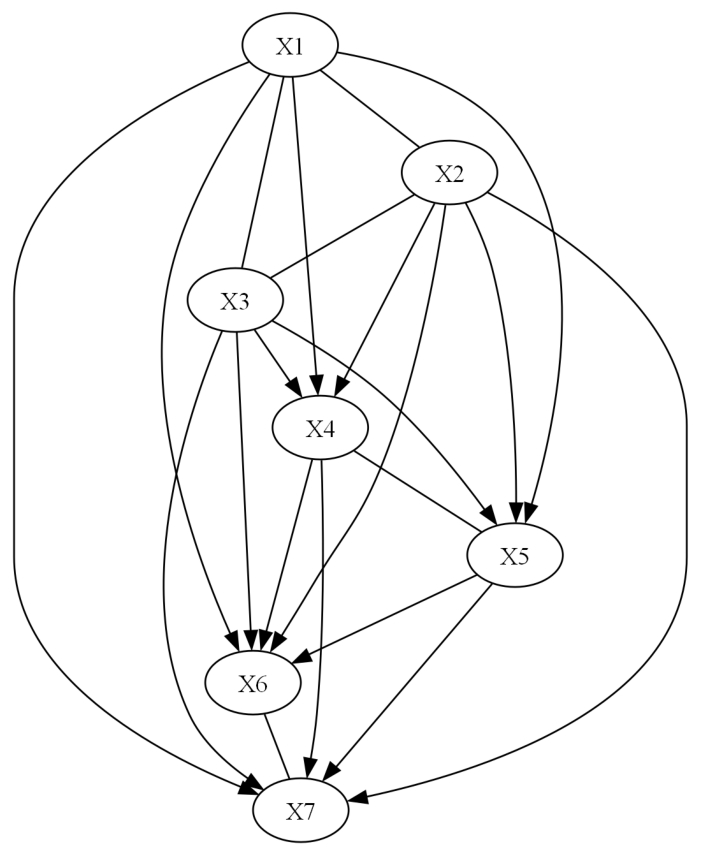

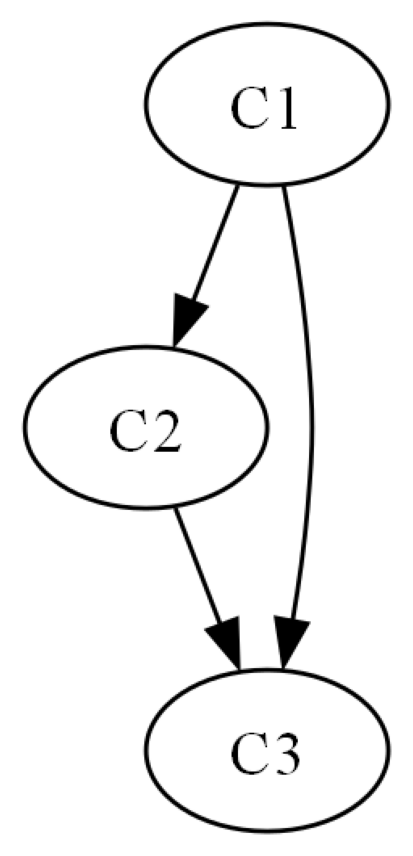

In [8]:
# Check if clustpc.cdag.cg is correct, e.g. cdag.cdag_to_mpdag worked and cluster_graph is correct
clustpc.cdag.draw_mpdag()
clustpc.cdag.draw_cluster_graph()

In [9]:
from causallearn.utils.cit import *
fisherz

'fisherz'

In [10]:
print(clustpc.cdag.cg.test)
type(clustpc.cdag.cg.test)

fisherz


str

In [11]:
clustpc.cdag.cg.set_ind_test('fisherz')
clustpc.cdag.cg.test

'fisherz'

In [12]:
# Test intra cluster phase
cluster = CDAG.get_node_by_name('C1', cg = cdag.cluster_graph)
clustpc.intra_cluster_phase(cluster)    

Depth=0, working on node 0:  14%|█▍        | 1/7 [00:00<00:00, 1000.55it/s]

AttributeError: 'str' object has no attribute 'method'